<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [17]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [18]:
#URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [19]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


Duplicate rows: 154
Missing values:
 model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64
fuelType
Petrol      12080
Diesel       5704
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


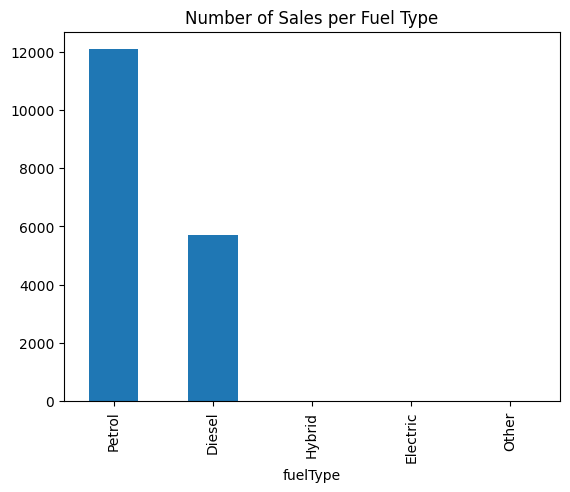

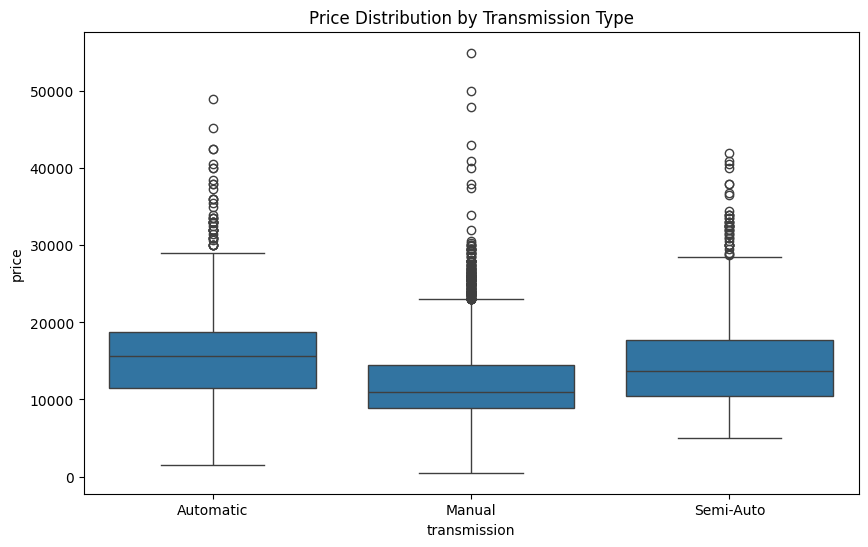

price         1.000000
year          0.635651
engineSize    0.411423
tax           0.406007
mpg          -0.346355
mileage      -0.530458
Name: price, dtype: float64


/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 2402.758775766444


/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression RMSE: 2252.148897091906


/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression RMSE: 2402.7579811991877
Best alpha: 100
Best RMSE: 2500.5437981310743


In [20]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df = pd.read_csv("dataset.csv")
df.head()

# Display the first few rows
df.head()
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop or fill missing values (you can also use interpolation or mean/mode depending on column)
df = df.dropna()
fuel_counts = df['fuelType'].value_counts()
print(fuel_counts)

fuel_counts.plot(kind='bar', title='Number of Sales per Fuel Type')
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to identify outliers in price by transmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()
# Check correlation with price
# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Now calculate correlation
correlation_matrix = numeric_df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

print("Linear Regression RMSE:", mean_squared_error(y_test, lr_pred, squared=False))
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X_train_scaled, y_train)
poly_pred = poly.predict(X_test_scaled)

print("Polynomial Regression RMSE:", mean_squared_error(y_test, poly_pred, squared=False))
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

print("Ridge Regression RMSE:", mean_squared_error(y_test, ridge_pred, squared=False))
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_['alpha'])
print("Best RMSE:", -grid.best_score_)


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
